#  문제: 합격할 확률 구하기
- 로지스틱 회귀 개념
- 시험 공부한 시간과 합격할 확률 관계
- 소프트맥스

# 데이터
## import

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams.update({'font.size': 15})

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

## 공부한 시간
- 합격자, 불합격자의 공부한 시간 데이터 : X1

In [3]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [4]:
len(pass_time), len(fail_time)

(18, 16)

In [5]:
X1= np.concatenate((pass_time,fail_time))
X1

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 16. , 16. , 16.5,
       17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,  5.2,
        5.4])

## 합격/불합격 레이블: y

In [6]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.concatenate((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 산포도

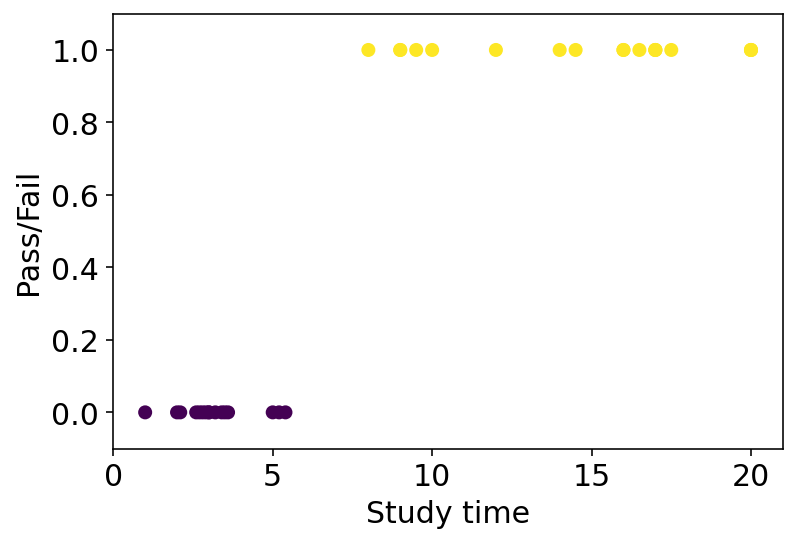

In [9]:
fig = plt.figure(figsize=(6,4))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass/Fail")
plt.scatter(X1, y, c=y)
plt.show()

# 모델


In [7]:
model = LogisticRegression() # (1) 모델 생성
model.fit(X1.reshape(-1,1),y) # (2) 학습
print(model.coef_)
print(model.intercept_)

[[1.32947604]]
[-9.18521575]


## 시그모이드 함수
- 로지스틱 회귀모델은 시그모이드 함수로 모델링한다 (선형 모델은 직선을 사용)
- "회귀"모델이지만 확률을 예측하므로 분류에서 주로 사용된다

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.11.56.png?raw=1" align='left'  width=400>

## 확률 p인 사건의 가치 (score)

- $log$(${1}\over{p}$) = $log$(1 + $e ^ {-s}$) $\propto$ $log$($e ^ {-s}$) = $-s$
- 확률 $p$ $\propto$ $e ^ {s}$
- 즉, 선형적인 값(score)과 확률(p)의 관계는 로그와 exp 의 관계이다

## 시그모이드 함수의 특성

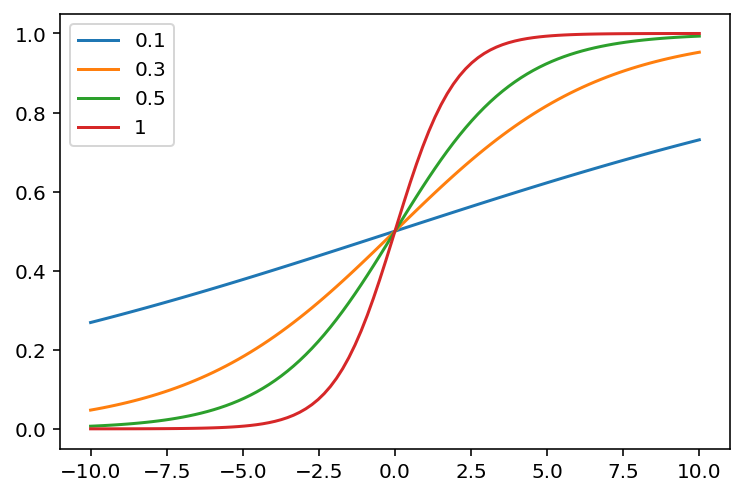

In [21]:
a_list = [0.1,0.3, 0.5, 1]
b = 0
xs = np.linspace(-10, 10, 100)

for a in a_list:
  ys = logreg(a*xs + b)
  plt.plot(xs, ys, label=a)
plt.legend()

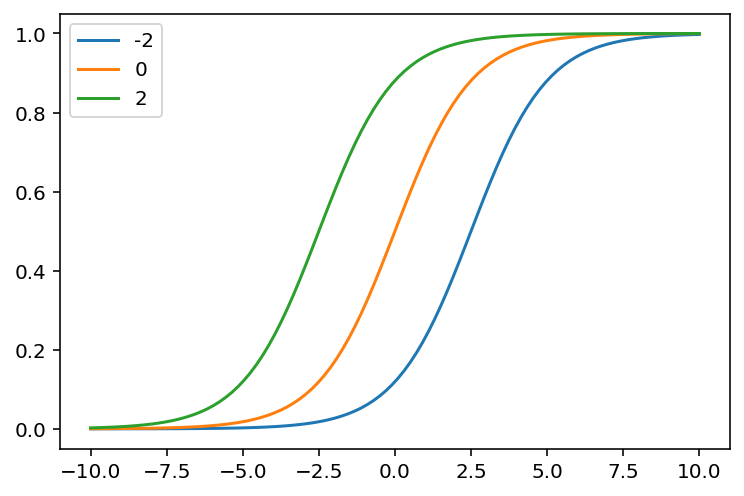

In [22]:
a = 0.8
b_list = [-2, 0, 2]
xs = np.linspace(-10, 10, 100)
for b in b_list: 
    ys = logreg(a*xs + b)
    plt.plot(xs, ys, label=b)
plt.legend()

## 모델 사용

In [10]:
def logreg(z):
    return 1 /(1+np.exp(-z)) # e^^z

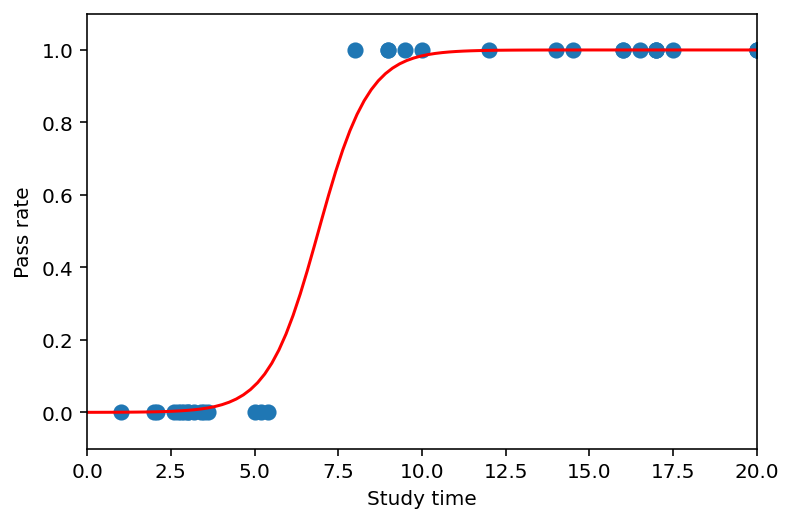

In [11]:
a, b = model.coef_[0][0], model.intercept_[0]
fig = plt.figure(figsize=(6,4))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X1, y, s=50)
xs = np.linspace(0,21,100)
ys = logreg(a*xs + b) # y = ax + b
plt.plot(xs, ys, c='r')
plt.show()

In [8]:
x_test = [[1.2],[8.8],[7.5]]
model.predict(x_test) # (3) 모델 사용

array([0, 1, 1])

## 분류 확률

In [9]:
model.predict_proba(x_test).round(3)

array([[0.999, 0.001],
       [0.075, 0.925],
       [0.313, 0.687]])

# 참고: 다중변수

- 게임한 시간도 같이 고려하는 경우

In [10]:
# 합격자, 불합격자 수는 동일 해야 함
pass_time_game = [1.5, 2, 2.1,2.6,2.1,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4, 1.3, 1.2]
fail_time_game = [16, 17, 16, 17,10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 18.1]
len(pass_time_game), len(fail_time_game)

(18, 16)

In [11]:
X2= np.concatenate((pass_time_game,fail_time_game));X2

array([ 1.5,  2. ,  2.1,  2.6,  2.1,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,
        3.6,  3. ,  5. ,  5.2,  5.4,  1.3,  1.2, 16. , 17. , 16. , 17. ,
       10. , 12. , 14. , 14.5, 15. , 16. , 16. , 16.5, 17. , 17. , 17. ,
       18.1])

- 데이터
 - 공부시간, 게임시간 취합

In [14]:
X = pd.DataFrame(list(zip(X1, X2))) ;X[:10]

,0,1
0,8.0,1.5
1,9.0,2.0
2,9.0,2.1
3,9.5,2.6
4,10.0,2.1
5,12.0,2.8
6,14.0,2.9
7,14.5,3.0
8,16.0,3.2
9,16.0,3.4


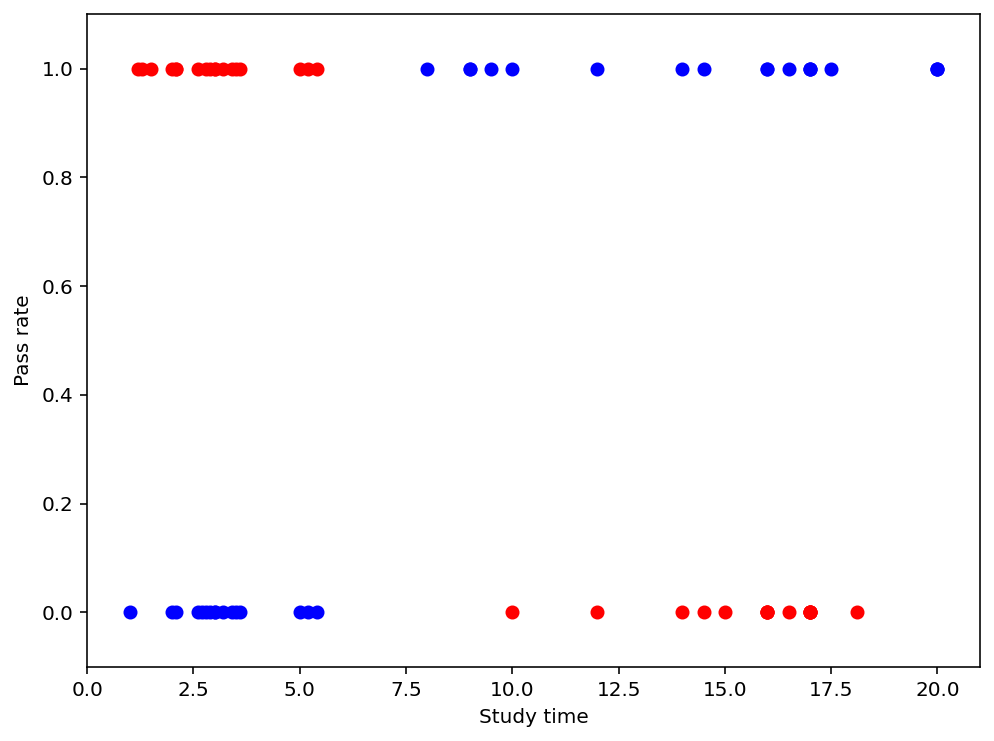

In [15]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
# plt.scatter(X1, y, c=y)
plt.scatter(X[0], y, c='b')
plt.scatter(X[1], y, c='r')
plt.show()

In [16]:
X.shape

(34, 2)

In [17]:
model = LogisticRegression() # (1) 모델 생성
model.fit(X,y) # (2) 학습 (컬럼이 2개))

print(model.coef_)
print(model.intercept_)

[[ 0.47269426 -0.61587179]]
[1.57048764]


In [18]:
model.predict_proba([[1.2,5.5],[8.8,1.9],[20,30]])

array([[7.77226126e-01, 2.22773874e-01],
       [1.03533202e-02, 9.89646680e-01],
       [9.99419930e-01, 5.80070400e-04]])

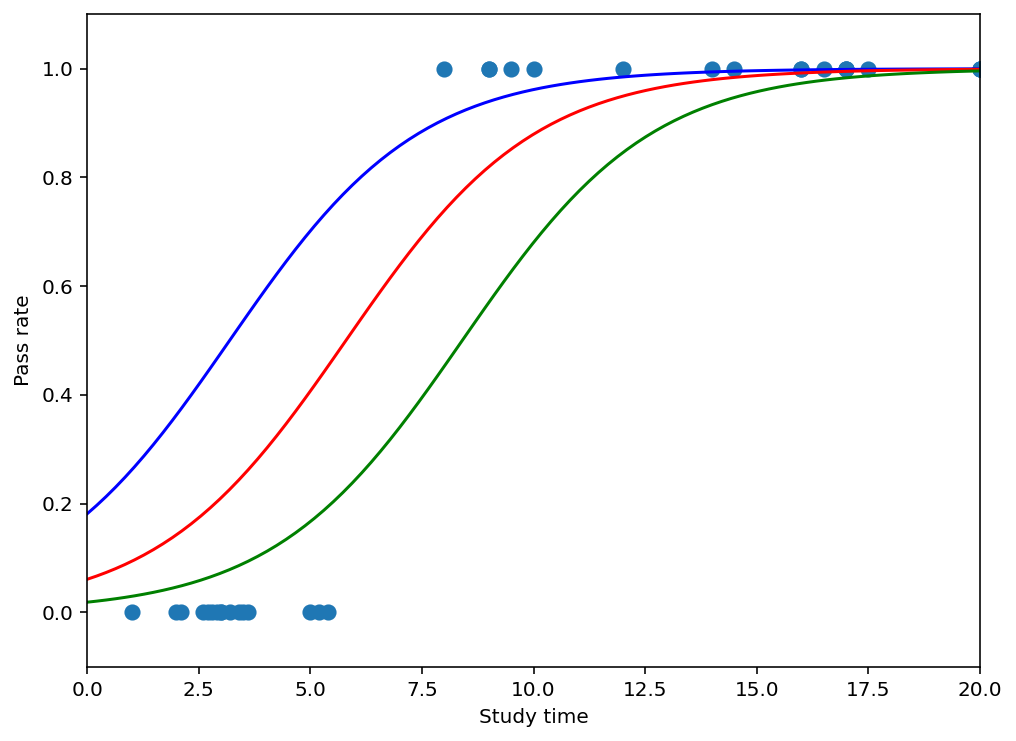

In [19]:
a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X[0], y, s=50)
xs = np.linspace(0,21, 100)
ys = logreg(a1*xs +a2*5+ b)
plt.plot(xs, ys, c='b')
ys = logreg(a1*xs +a2*7+ b)
plt.plot(xs, ys, c='r')
ys = logreg(a1*xs +a2*9+ b)
plt.plot(xs, ys, c='g')
plt.show()

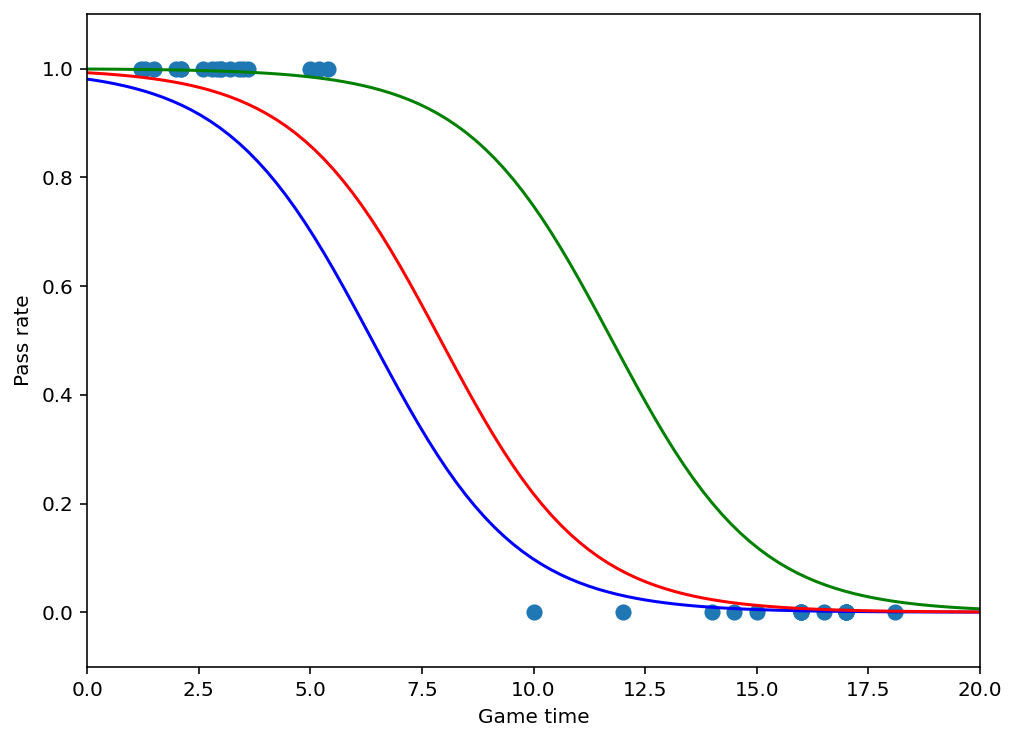

In [20]:
def logreg(z):
    return 1 /(1+np.exp(-z))

a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Game time')
plt.ylabel('Pass rate')
plt.scatter(X[1], y, s=50)
XX = np.linspace(0,21, 100)
yy = logreg(a1*5 +a2*XX+ b)
plt.plot(XX, yy, c='b')
yy = logreg(a1*7 +a2*XX+ b)
plt.plot(XX, yy, c='r')
yy = logreg(a1*12 +a2*XX+ b)
plt.plot(XX, yy, c='g')
plt.show()

# 참고: 성별 분류 문제

## 데이터 읽기

In [12]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## 전처리

In [13]:
# 성별 인코딩, 단위 변환 (인치, 파운드 --> cm, kg)
data.Gender = data.Gender.map({'Male':0, 'Female':1})
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


In [14]:
# 백업
df = data.copy()

## 데이터 나누기
- 성별  예측
- X: 키와 몸무게 (2개의 특성을 사용)
- y: 성별 (남여를 구분하는 이진 분류 문제)

In [15]:
X = df[["Height", "Weight"]]
y = df.Gender

## 스케일링

In [20]:
X_sc = X.copy()
scaler = StandardScaler()
X_sc.loc[:,:] = scaler.fit_transform(X_sc)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((7500, 2), (2500, 2), (7500,), (2500,))

## 모델: 로지스틱 회귀

In [21]:
model = LogisticRegression() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 학습

LogisticRegression()

In [22]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [25]:
y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[1121   95]
 [ 119 1165]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1216
           1       0.92      0.91      0.92      1284

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



In [28]:
proba_1 = model.predict_proba(X_test)[:,1]
proba_1

array([9.99922226e-01, 9.42651621e-01, 8.30237979e-01, ...,
       2.91707174e-04, 3.90004188e-03, 2.28811293e-02])

## Precisio-Recall 선택하기

In [35]:
y_pred_5 = (proba_1 > 0.5)*1
show_clf_result(y_test, y_pred_5)

[[1121   95]
 [ 119 1165]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1216
           1       0.92      0.91      0.92      1284

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



In [37]:
y_pred_8 = (proba_1 > 0.8)*1
show_clf_result(y_test, y_pred_8)

[[1177   39]
 [ 291  993]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1216
           1       0.96      0.77      0.86      1284

    accuracy                           0.87      2500
   macro avg       0.88      0.87      0.87      2500
weighted avg       0.88      0.87      0.87      2500



In [38]:
y_pred_3 = (proba_1 > 0.3)*1
show_clf_result(y_test, y_pred_3)

[[1034  182]
 [  65 1219]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1216
           1       0.87      0.95      0.91      1284

    accuracy                           0.90      2500
   macro avg       0.91      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



# 참고: 소프트맥스

- 로지스틱 회귀 모델을 3개 이상의 분류에 적용할 때 소프트맥스 기법을 사용
- 다항 로지스틱스라고도 한다
- 분류 모델이 계산으로 얻은 선형적인 값을 확률로 매핑하는데 소프트맥스가 주로 사용된다.


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.25.18.png?raw=1" align='left'  width=400>

In [39]:
# 소프트맥스 구현(계산식)
score = [11,2,3,4,5] # 선형 세계의 점수
prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.996 0.    0.    0.001 0.002]
